# Assignment 1: Probability fundamentals

<span style="font-size:18px;">

In the following exercises, we will review some basic probability concepts. We will be using Bayes' formula, the law of total probability, the law of conditional probability, and the definition of independence. Instead of introducing these concepts here, I want to refer you to the following great resource: 

- [Data analysis recipes: Probability calculus for inference by David Hogg](https://arxiv.org/abs/1205.4446) 

Please read the above paper and then answer the exercises posted in it. We will not tackle all of the exercises in Hogg (2012) but focus on a selection. The following questions should be answered always in the cells below the exercise questions.
</span>

## Exercise 1 (4 points)
<span style="font-size:18px;">

**Exercise 1.1**: You have conditional pdfs $p(a \mid d), p(b \mid a, d)$, and $p(c \mid a, b, d)$. Write expressions for $p(a, b \mid d)$, $p(b \mid d)$, and $p(a \mid c, d)$.  

**Exercise 1.2**: You have conditional pdfs $p(a \mid b, c)$ and $p(a \mid c)$ expressed or computable for any values of $a$, $b$, and $c$. You are not permitted to multiply these together, of course. But can you use them to construct the conditional pdf $p(b \mid a, c)$ or $p(b \mid c)$? Did you have to make any assumptions?
</span>

### Answer to exercise 1
**Exercise 1.1**:

$p(a, b \mid d) = p(a \mid d) \cdot p(b \mid a, d)$

$p(b \mid d) = \int p(a \mid d) \cdot p(b \mid a, d)\,\mathrm{d}a$

$p(a \mid c, d) = \frac{p(c \mid a, d)p(a \mid d)}{p(c \mid d)} = \frac{p(c \mid a, d)p(a \mid d)}{\int p(c \mid a, d) \cdot p(a \mid d)\,\mathrm{d} a} = \frac{p(c \mid a, d)p(a \mid d)}{\int \int p(c \mid a, b, d)\cdot p(b \mid a, d)\,\mathrm{d}b \cdot p(a \mid d)\,\mathrm{d} a} = \frac{\int p(c \mid a, b, d)\cdot p(b \mid a, d)\,\mathrm{d} b \cdot p(a \mid d)}{\int \int p(c \mid a, b, d)\cdot p(b \mid a, d)\,\mathrm{d}b \cdot p(a \mid d)\,\mathrm{d} a}$

**Exercise 1.2**:

We only have the equations $p(b | a, c) = \frac{p(a | b, c)p(b |c)}{p(a | c)}$ and $p(b | c) = \int p(b | a, c) \cdot p(a | c) \,\mathrm{d} a$, hence we can only calculate the asked pdfs, if we can assume that we have one of the two.

If we assume that $a$ and $b$ are independent given $c$, then the pdfs are equal: $p(b \mid a, c) = p(b \mid c)$.

Otherwise we cannot infer them, because the pdfs in question have units in $\frac{1}{b}$, and the pdfs we know have units in $\frac{1}{a}$.

## Exercise 2 (4 points)
<span style="font-size:18px;">

**Exercise 2.1**: You have conditional pdfs $p(a \mid c)$ and $p(b \mid c)$ expressed or computable for any values of $a$, $b$, and $c$. Can you use them to construct the conditional pdf $p(a | b, c)$?

**Exercise 2.2**: You have a function $g(b)$ that is a function only of $b$. You have conditional pdfs $p(a \mid c)$ and $p(b \mid a, c)$. What is the expectation value $\mathbb{E}(g \mid c)$ for $g$ conditional on $c$ but not conditional on $a$?
</span>

### Answer to Exercise 2

**Exercise 2.1**: If $a$ and $b$ are independent, then $p(a | b, c) = p(a | c)$. Otherwise if we also know $p(b | a, c)$, then $p(a | b, c) = \frac{p(b | a, c)p(a |c)}{p(b | c)}$. If we do not know it, but know $p(a, b | c)$, then $p(a | b, c) = \frac{p(a, b | c)}{p(b | c)}$. In any other cases we cannot construct $p(a | b, c)$.

**Exercise 2.2**: $\mathbb{E}(g \mid c) = \int g(b)\cdot p(b | c)\,\mathrm{d}b = \int g(b) \cdot (\int p(b | a, c)\cdot p(a | c)\,\mathrm{d}a)\,\mathrm{d}b$

## Exercise 3 (3 points)
<span style="font-size:18px;">

Given the linear regression problem introduced in section 2 of Hoggs' paper, dicuss the following questions related to the likelihood function $\mathcal{L}$:

$$ \mathcal{L} = \prod_n \mathcal{N}(y_n \,|\, a x_n + b, \sigma_n) $$

**Exercise 3**: Show that the likelihood for the model given in equations (28) through (34) in Hogg (2012) can be written in the form $Q\,exp(−\chi^2/2)$, where $\chi^2$ is the standard statistic for weighted least-squares problems. On what does $Q$ depend, and what are its dimensions?
</span>

### Answer to Exercise 3

$$ \mathcal{L} = \prod_n \mathcal{N}(D_n \,|\, a x_n + b, \sigma_n^2) =\prod_n \frac{1}{\sqrt{2\pi \sigma_n^2}}e^{-\frac{D_n -(ax_n + b)}{2\sigma_n^2}} =\prod_n \frac{1}{\sqrt{2\pi \sigma_n^2}}e^{-\frac{y_n + \epsilon_n - ax_n - b}{2\sigma_n^2}} =\prod_n \frac{1}{\sqrt{2\pi \sigma_n^2}}e^{-\frac{ax_n + b + \epsilon_n - ax_n - b}{2\sigma_n^2}}\\ 
= \prod_n \frac{1}{\sqrt{2\pi \sigma_n^2}}e^{-\frac{\epsilon_n}{2\sigma_n^2}} = \frac{1}{\sqrt{2\pi}^n}\frac{1}{\prod_n\sigma_n}e^{-\frac{1}{2}\sum_n\frac{\epsilon_n}{\sigma_n^2}} = \frac{1}{\sqrt{2\pi}^n}\frac{1}{\prod_n\sigma_n}e^{-\frac{\chi^2}{2}}$$


Hence

$$
Q = \frac{1}{\sqrt{2\pi}^n}\frac{1}{\prod_n\sigma_n}
$$

It depends on the parameters $\sigma_n$ (standard deviations) and its dimensions are $1$ x $p$, where $p$ is the number of features in $x_n$.

## Exercise 4 (4 points)
<span style="font-size:18px;">

**Exercise 4**: The likelihood in equation (32) in Hogg (2012) is a product of Gaussians in $D_n$. At fixed data and $b$, what shape will it have in the $a$ direction? That is, what functional form will it have when thought of as being a function of $a$? You will have to use the properties of Gaussians (and products of
Gaussians). 
</span>

### Answer to Exercise 4

$$
p({D_n}_{n=1}^N \mid \theta, I) = \prod_{n=1}^N{p(D_n \mid \theta,I)} = \frac{1}{\sqrt{2\pi}^n}\frac{1}{\prod_n\sigma_n}e^{-\frac{\chi^2}{2}}
$$

as seen above, hence it is a constant function of $a$, its shape is a straight horizontal line.

## Exercise 5 (2 points)
<span style="font-size:18px;">

**Exercise 4**: Show that if you take the model in equations (28) through (34) in Hogg (2012) and put a Gaussian prior pdf on $a$ and an *independent* Gaussian prior pdf on $b$ that your posterior pdf for $a$ and $b$ will be a two-dimensional Gaussian. Feel free to use informal or even hand-waving arguments; there are no
mathematicians present.
</span>

### Answer to Exercise 5

We know that $p(a) = \mathcal{N}(a \mid \mu_a,\sigma_a^2)$ and $p(b) = \mathcal{N}(b \mid \mu_b,\sigma_b^2)$. Because $a$ and $b$ are independent we also know that $p(a, b) = p(a)p(b)$. Using this, the equation 10 in Hogg (2012), and that $a$ and $b$ are independent from the data $\mathbf{x}$ we have that
$$
p(a, b \mid \mathbf{x}, \mathbf{D}) = \frac{1}{Z}p(\mathbf{D} \mid a, b, \mathbf{x})p(a, b \mid \mathbf{x}) = \frac{1}{Z}p(\mathbf{D} \mid a, b, \mathbf{x})p(a)p(b)\\
=\frac{1}{Z}\prod_n\mathcal{N}(D_n \mid ax_n+b, \sigma_n^2)\mathcal{N}(a \mid \mu_a,\sigma_a^2)\mathcal{N}(b \mid \mu_b,\sigma_b^2)\\
=\frac{1}{Z'}exp(-\frac{a-\mu_a}{2\sigma_a^2})exp(-\frac{b-\mu_b}{2\sigma_b^2})
$$

$Z'$ is equal to $2\pi\sigma_a\sigma_b$ as this is the only way that our function is a pdf, which it must be.
Hence the posterior pdf is a two-dimensional Gaussian with parameters $
\begin{pmatrix}
\mu_a \\
\mu_b 
\end{pmatrix}
$
and $
\begin{pmatrix}
\sigma_a^2, 0 \\
0, \sigma_b^2 
\end{pmatrix}
$.


## Exercise 6 (2 point) 

<span style="font-size:18px;">

Bayesian inference often involves computing high-dimensional integrals. For example the posterior pdf is given by:

$$ p(\theta \mid D, I) = \frac{1}{Z} \, p(D \mid \theta, I) \, p(\theta \mid I) $$

where
$$ Z = \int p(D \mid \theta, I) \, p(\theta \mid I) \, d\theta $$

In many cases, these integrals such as $Z$ are analytically intractable, and we have to resort to numerical methods. One of the most popular methods for this is Monte Carlo integration. Monte Carlo integration is an absolute crucial notion in modern statistics and machine learning. If you have to solve an integral that you can write down the integrand as a product of a function $f(x)$ and a pdf $p(x)$, where $\int p(x) dx = 1$, you can use Monte Carlo integration to solve it. Provided that you can sample from $p(x)$ and evaluate $f(x)$ you can approximate the integral by

$$ \int f(x) p(x) dx \approx \frac{1}{N} \sum_{i=1}^N f(x_i) $$

where $x_i$ are samples drawn from $p(x)$.

**Exercise 6**: Write a Python function that computes the integral of $f(x) = x^2$ over the interval $[1, 3]$ using Monte Carlo integration. Use $N = 1000$ samples to compute the integral. Compare your result with its true value.

</span>

In [47]:
import numpy as np
from scipy.integrate import quad

def f(x: float) -> float:
    """Function to be integrated.

    Args:
        x (float): The input value.

    Returns:
        float: The value of f(x) = x^2.
    """
    return x**2

def p(a: float, b: float) -> float:
    """Generates a random sample from a uniform distribution between a and b.

    Args:
        a (float): The lower bound of the interval.
        b (float): The upper bound of the interval.

    Returns:
        float: A random number uniformly sampled from [a, b].
    """
    return np.random.uniform(a, b)

def calculate_MC_integral(f, p, a: float, b: float, N: int) -> float:
    """Calculates the integral of a function using Monte Carlo integration.

    Args:
        f: The function to integrate.
        p: The random sample generator function.
        a (float): The lower limit of integration.
        b (float): The upper limit of integration.
        N (int): The number of random samples to use.

    Returns:
        float: The estimated value of the integral.
    """
    integral = 0.0
    for _ in range(N):
        integral += f(p(a, b))  # Evaluate f at a random point in [a, b]
    
    integral *= (b - a) / N  # Scale by the width of the interval and number of samples
    return integral

# Set a random seed for reproducibility
np.random.seed(42)

# Define the integration limits and the number of samples
a = 1
b = 3
N = 1000

# Calculate the Monte Carlo integral
MC_integral = calculate_MC_integral(f, p, a, b, N)

# Calculate the true integral using scipy's quad function
true_integral = list(quad(f, a, b))[0]

# Print the results
print(f"The integral calculated by the Monte Carlo method is {MC_integral}")
print(f"The true integral is {true_integral}")



The integral calculated by the Monte Carlo method is 8.526935483206897
The true integral is 8.666666666666668


---

# The Fisher information matrix

<span style="font-size:18px;">

The Fisher information matrix is the expectation value of the variance of the log-likelihood function, which is often just the expectation of the Hessian of the log-likelihood function. To obtain it, you need to compute the second derivatives with respect to the model parameters. For a data set $D$ and model parameters $\mathbf{\theta}$, the Fisher information matrix is defined as:
$$\mathcal{F}_{jk} = -\mathbb{E}\left[\frac{\partial^2}{\partial\theta_j \, \partial\theta_k}\ln\mathcal{L}(D \,|\, \theta)\right]$$

In this case, our model for the data is one dimensional and linear:

$$f(x \,;\, \theta) = a \, x + b \hspace{15pt} \text{with}\hspace{7pt} \theta = (a, b) $$

and we will assume that the data are generated from some process such that the uncertainties $\sigma_y$ are Gaussian (I'll drop the subscript $y$). Our likelihood function $L$ for a single data point $(x_i, y_i, \sigma_i)$ is then

$$ L(y_i \,;\, \theta) = \mathcal{N}(y_i \,|\, f(x \,;\, \theta), \sigma_i) $$

In this model, the data points are independent, so the total likelihood $\mathcal{L}$ is just the product of the likelihoods for each individual data point:

$$ \begin{align}
\mathcal{L} &= \prod_i L(y_i \,;\, \theta)\\ 
&= \prod_i \mathcal{N}(y_i \,|\, f_i, \sigma_i)
\end{align} $$

where $f_i = f(x_i \,;\, \theta)$.

The Fisher information matrix is then the expectation value of the Hessian of the log-likelihood function. The log-likelihood function is, given Normally distributed errors:

$$ \ln\mathcal{L} = -\frac{1}{2} \sum_i \left[ \frac{(y_i - f_i)^2}{\sigma_i^2} + \ln(2\pi\sigma_i^2) \right] $$

Thus, we need to take second derivatives of the above expression. Although in this simple case we can do this analytically, for more complex models this expression can get increasingly difficult to write down. Thankfully, we can use automatic differentiation to do this!
</span>

## Create data and set up a model for linear regression

In [6]:
# Make sure you have the following packages installed
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import blackjax

In [7]:
# Data parameters
ndata = 10
rng = np.random.default_rng(45)
true_pars = rng.normal(0, 3.0, size=2)
pars = {"a": true_pars[0], "b": true_pars[1]}
# Generate some data
x = np.sort(rng.uniform(0, 10, ndata))
yerr = 10 ** rng.uniform(-1, 0, ndata)
y = rng.normal(pars["a"] * x + pars["b"], yerr)
# Create data dictionary
data = {"x": x, "y": y, "yerr": yerr}

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

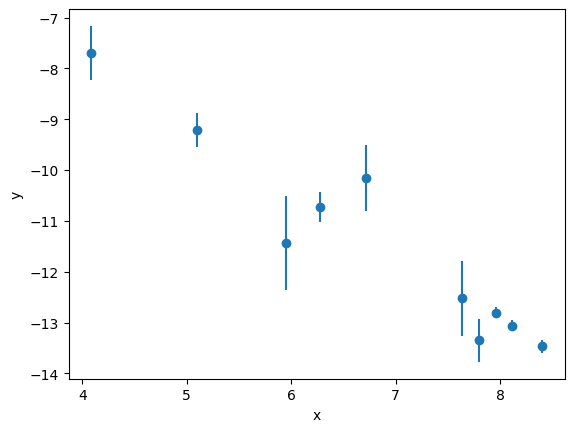

In [8]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr, marker="o", ls="none")
ax.set(xlabel="x", ylabel="y")

## Exercise 7.1 (2 points)
<span style="font-size:18px;">

**Exercise 7.1**: Implement the likelihood function for the linear regression model described above. The likelihood function should take a dictionary of parameters `pars` and a dictionary of data `data` as arguments and return the log-likelihood of the data given the parameters. The log-likelihood should be calculated using the Gaussian likelihood function. 

*Hint: The jax library has a useful `jax.scipy.stats.norm.logpdf` function that you can use to calculate the log-likelihood of a single data point.*

</span>

In [10]:
# Single point likelihood
@jax.jit
def ln_likelihood_one_point(pars, data):
    # pars is a dictionary with keys "a" and "b"
    # data is a dictionary with keys "x", "y", and "yerr"
    y = data["y"]
    x = pars["a"] * data["x"] + pars["b"]
    yerr = data["yerr"]
    ln_single_pt = jax.scipy.stats.norm.logpdf(y, x, yerr)
    return ln_single_pt

# Vectorized likelihood
ln_likelihood_helper = jax.vmap(
    ln_likelihood_one_point, in_axes=(None, {"x": 0, "y": 0, "yerr": 0})
)

# Full likelihood
@jax.jit
def ln_likelihood(pars, data):
    return jnp.sum(ln_likelihood_helper(pars, data))

## Fisher matrix via auto-diff

<span style="font-size:18px;">

Having defined the likelihood function, we can now compute the Fisher matrix using automatic differentiation. The Fisher matrix is the expectation value of the Hessian of the log-likelihood function. We can compute the Hessian of the log-likelihood function using the `jax.hessian` function. The Fisher matrix is then the negative of the Hessian of the log-likelihood function.

</span>

In [11]:
F = jax.hessian(ln_likelihood)(pars, data) 
F = -np.array([list(f.values()) for f in F.values()])
# Invert the Fisher matrix
Finv = np.linalg.inv(F)

## Exercise 7.2 (1 point)

<span style="font-size:18px;">

**Exercise 7.2**: Interpret the values of the Fisher matrix below. What do the diagonal elements represent? What do the off-diagonal elements represent?
</span>

In [12]:
print(Finv)

[[ 0.00566134 -0.04444363]
 [-0.04444363  0.35288954]]


## Answer to Exercise 7.2
- The diagonal elements represent how much information the data provides about the individual parameters. As the entry for parameter $a$ is way less than the one for parameter $b$ (0.006 <<< 0.353), we can say that there is much more information about $b$ in the data. For $a$ we basically have no information, as the corresponding value is almost 0.
- The off-diagonal elements represenet the same thing: the correlation between the two parameters, in our case it is fairly close to 0 (-0.04), hence we can say that the parameters $a$ and $b$ are independent, as expected.

# Exercise 8 (2 points)

<span style="font-size:18px;">

**Exercise 8**: Define and finish the log prior and log posterior functions below to allow the application of MCMC sampling. MCMC samples the posterior distribution of the parameters $a$ and $b$ given the data and the likelihood function. The sampler should take the following arguments: the log posterior function, the initial parameters, the data dictionary, and the number of samples to generate. 

</span>

In [16]:
@jax.jit
def ln_prior(pars):
    mean = 0.0
    sigma = 10.0
    # The parameters are in the dictionary "pars" and both have Gaussian priors with mean=0 and stddev=10
    # Make sure to return the log prior value (lp)
    lp = 0.0
    # Gaussian prior on the amplitudes with mean=0, stddev=10:
    lp += jax.scipy.stats.norm.logpdf(pars["a"], loc=mean, scale=sigma)
    # Gaussian prior on the intercepts with mean=0, stddev=10:
    lp += jax.scipy.stats.norm.logpdf(pars["b"], loc=mean, scale=sigma)
    return lp


@jax.jit
def ln_posterior(pars, data):
    return ln_likelihood(pars, data) + ln_prior(pars)

## Sample the posterior using MCMC

<span style="font-size:18px;">

We will now sample the posterior using MCMC. We will use the NUTS sampler from the `blackjax` library. We will first run a warm-up phase to adapt the step size and the number of leapfrog steps. Then we will run the sampler to generate samples from the posterior distribution. 

</span>

In [17]:
# Set up the MCMC sampler
rng_key, warmup_key, sample_key = jax.random.split(jax.random.PRNGKey(42), 3)
init_pars = pars
func_post = lambda theta: ln_posterior(theta, data)

# Run the warmup phase
warmup = blackjax.window_adaptation(blackjax.nuts, func_post)
(state, parameters), _ = warmup.run(warmup_key, init_pars, num_steps=1000)

In [18]:
# Define the inference loop
def inference_loop(rng_key, kernel, initial_state, num_samples):
    @jax.jit
    def one_step(state, rng_key):
        state, _ = kernel(rng_key, state)
        return state, state

    keys = jax.random.split(rng_key, num_samples)
    _, states = jax.lax.scan(one_step, initial_state, keys)

    return states

In [19]:
# Run the MCMC sampler
kernel = blackjax.nuts(func_post, **parameters).step
# The initial state is the final state of the warmup phase
states = inference_loop(sample_key, kernel, state, 10_000)
# Extract the samples
mcmc_samples = {k: samples for k, samples in states.position.items()}
# Calculate the covariance matrix via the samples
Cov = np.cov(np.stack(list(mcmc_samples.values())))

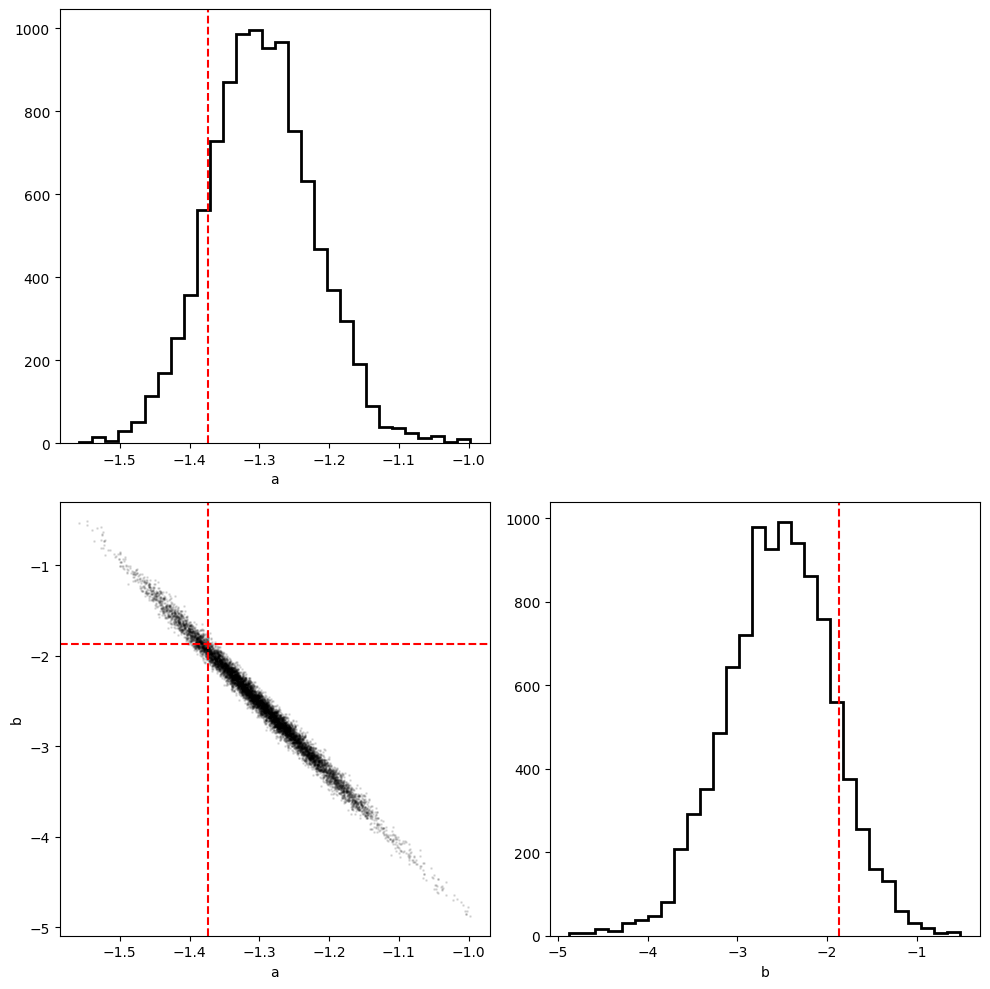

In [20]:
# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, key in enumerate(mcmc_samples.keys()):
    ax[i % 2, i].hist(mcmc_samples[key], bins=30, histtype="step", color="k", lw=2)
    ax[i % 2, i].set_xlabel(key)
    ax[i % 2, i].axvline(true_pars[i], color="r", ls="--")
    

# Turn 0, 1 off
ax[0, 1].axis("off")

ax[1, 0].scatter(mcmc_samples["a"], mcmc_samples["b"], s=1, color="k", alpha=0.1)
ax[1, 0].set(xlabel="a", ylabel="b")
ax[1, 0].axvline(true_pars[0], color="r", ls="--")
ax[1, 0].axhline(true_pars[1], color="r", ls="--")

plt.tight_layout()

## Exercise 9 (4 point)

<span style="font-size:18px;">

**Exercise 9.1**: Interpret the results of the MCMC sampling. Compare the MCMC samples with the true parameters. Are the MCMC samples consistent with the true parameters? 

**Exercise 9.2**: Compare the covariance matrix of the MCMC samples with the Fisher matrix. What do they both mean and are they consistent with each other?

**Exercise 9.3**: What are the advantages and disadvantages of using MCMC sampling compared to the Fisher matrix?

</span>

In [21]:
print(f'MCMC covariance matrix:\n{Cov}')
print(f'{30*"="}')
print(f'Fisher matrix:\n{Finv}')

MCMC covariance matrix:
[[ 0.00567569 -0.04449755]
 [-0.04449755  0.35291177]]
Fisher matrix:
[[ 0.00566134 -0.04444363]
 [-0.04444363  0.35288954]]


# Answer to Exercise 9
**Exercise 9.1**: The results of the MCMC sampling show normal distributions for both of our parameters, where the mean of the distribution is rather close to the true parameters. It is also worth noting that parameter $a$ is less than the corresponding sample mean, while parameter $b$ is above it. This is because of the way the data is created, if $a$ decreases $b$ has to increase as we can also see on the scatterplot.

**Exercise 9.2**: As already discussed the Fisher matrix tells us how much information lies in the data about the parameters and what is their covariance. The MCMC covariance matrix shows empricial covariance, and it is essentially the same what is in the Fisher matrix. It also shows the variances of the individual parameter samples. These values are also consistent with the corresponding values from the Fisher matrix, as our posterior distribution is Gaussian.

**Exercise 9.3**: The advantages are that it does not require a Gaussian posterior and we can add priors, and the disadvantages are that it is computationally more expensive and harder to implement.